In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [3]:
auto_insurence = pd.read_csv('C:\\Piazza\\CUTe3\\DataSet3_AutoInsuranceData.csv', sep = ',')


In [4]:
# Target Variable Distribution
auto_insurence.groupby(['Target']).size()

Target
0    2762
1    3976
dtype: int64

In [5]:
auto_insurence.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,Target
0,1,4,2,2,3,A5,NoRisk,6,2,2,Type1,L3,1
1,1,4,2,2,3,A5,NoRisk,6,2,2,Type1,L3,0
2,1,4,2,2,3,A2,NoRisk,6,2,2,Type1,L3,1
3,1,4,2,2,3,A2,NoRisk,6,2,2,Type1,L3,0
4,1,4,2,2,3,A2,NoRisk,6,2,2,Type1,L3,1


In [6]:
encoder = preprocessing.LabelEncoder()
auto_insurence['P7'] = encoder.fit_transform(auto_insurence['P7'])
auto_insurence['P12'] = encoder.fit_transform(auto_insurence['P12'])
auto_insurence['P11'] = encoder.fit_transform(auto_insurence['P11'])
auto_insurence['P6'] = encoder.fit_transform(auto_insurence['P6'])


In [7]:
X = auto_insurence.loc[:, auto_insurence.columns != 'Target']
Y = auto_insurence['Target']

trainX, testX, trainY, testY = train_test_split(X,Y, random_state = 10, test_size = 0.2)

In [8]:
tree_learner = DecisionTreeClassifier(min_samples_split=50, max_depth=5)
tree_learner.fit(trainX , trainY)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
tree_learner.feature_importances_

array([0.        , 0.        , 0.01291362, 0.01948465, 0.00965207,
       0.02116449, 0.        , 0.91840202, 0.00475404, 0.        ,
       0.0083305 , 0.0052986 ])

In [10]:
trainX.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12'],
      dtype='object')

In [11]:
imp_features = pd.DataFrame({"imp_features":tree_learner.feature_importances_, "columns":trainX.columns})
print(imp_features)

   columns  imp_features
0       P1      0.000000
1       P2      0.000000
2       P3      0.012914
3       P4      0.019485
4       P5      0.009652
5       P6      0.021164
6       P7      0.000000
7       P8      0.918402
8       P9      0.004754
9      P10      0.000000
10     P11      0.008331
11     P12      0.005299


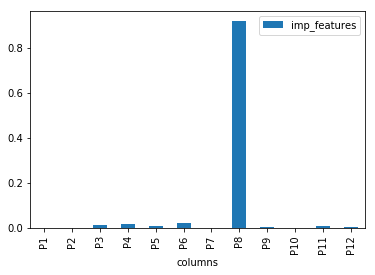

In [71]:
imp_features.plot.bar(x="columns", y="imp_features")

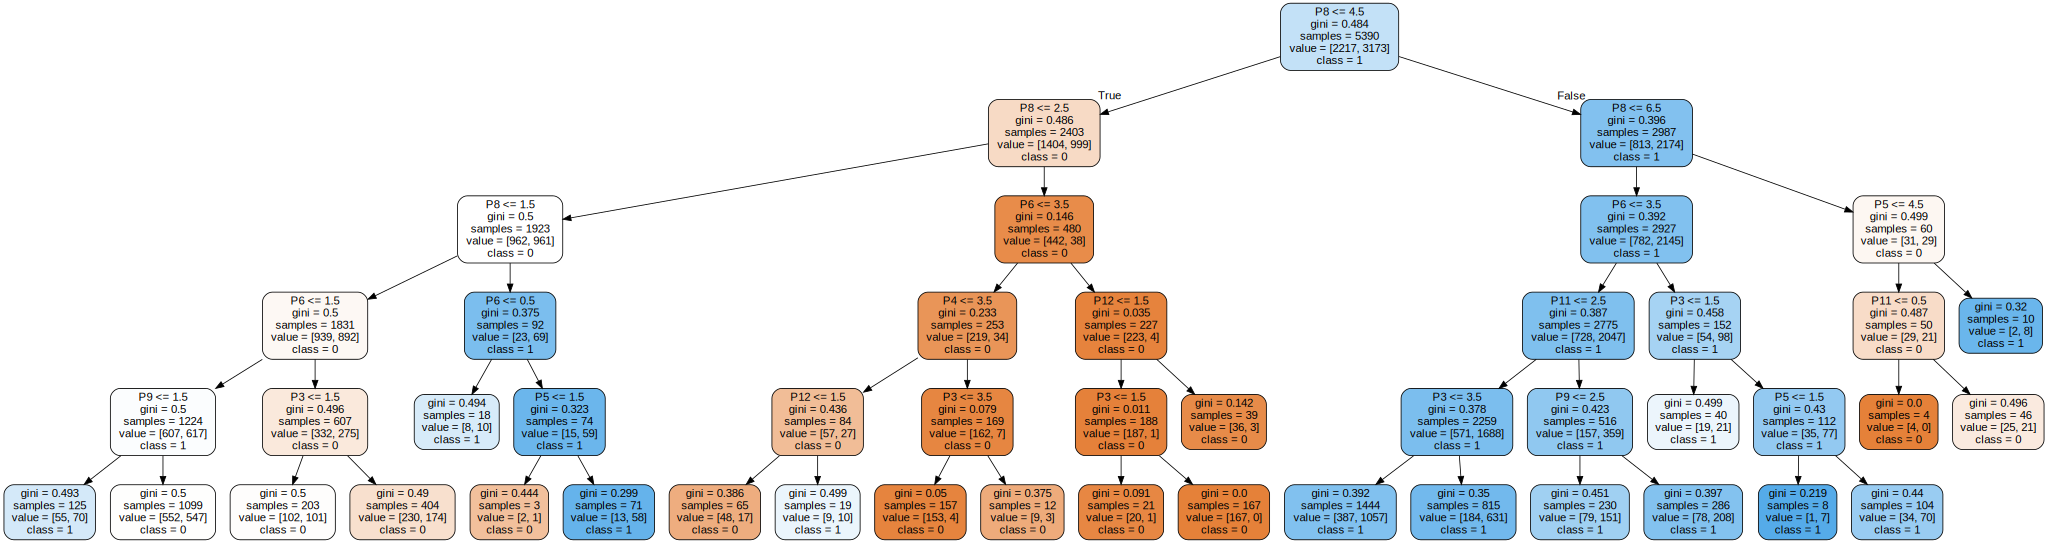

In [72]:
dot_data = tree.export_graphviz(tree_learner, out_file=None, 
                         feature_names=trainX.columns,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=False)  
graph = graphviz.Source(dot_data)  
graph